#  importing_libraray

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import sklearn
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential
import glob
import glob as gb
from sklearn import preprocessing
from matplotlib import pyplot as plt
import plotly.express as px
from skimage.transform import AffineTransform, warp
from skimage import io, img_as_ubyte
from sklearn import  metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
%matplotlib inline
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from pathlib import Path
from PIL import Image 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense,Flatten
import re
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import LabelBinarizer 
import PIL 
import cv2

# Using_function 

In [2]:
def create_label(df):
    res = []
    for i in range(len(df)):
        res.append("id_{}_label_{}".format((i), df.iloc[i]["label"]))
    return res

In [3]:
def load_images(path):
    pathes_list = np.sort(glob.glob(path))
    features = np.empty((len(pathes_list), 32, 32), dtype=np.float32)
    for index, file_path in enumerate(pathes_list):
        features[index] = Image.open(file_path).convert('L')
    return features

In [4]:
def display_image(images, labels, pos):
    image = images[pos].squeeze()
    plt.title('Example %d. Label: %s' % (pos, characters_dict[labels[pos]-1]))
    plt.imshow(image, cmap=plt.cm.gray_r)

In [5]:
def read_img(root_dir, img):
    img_path = "{}{}".format(root_dir, img)
    img = cv2.imread(img_path)
    plt.imshow(img)
    h, w, c = img.shape
    print(h, w, c)

In [6]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(28), predictions_array, color="white")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [7]:
def plot_image(i, predictions_array, true_label, img):
  
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(True)
  plt.xticks([])
  plt.yticks([])
  
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
    
  if predicted_label == true_label:
    color = 'white'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(characters_dict[predicted_label],
                                100*np.max(predictions_array),
                                characters_dict[true_label]),
                                color=color)

In [8]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(10,6))
    plt.plot(fpr, tpr, color='white', label='ROC')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

# loading_dataset

In [49]:
train = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\Selected\\input\\arabic-hwr-ai-pro-intake1\\train.csv")
test = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\Selected\\model.csv")

In [10]:
train_features = load_images("C:\\Users\\Lenovo\\Desktop\\Selected\\input\\arabic-hwr-ai-pro-intake1\\train\\*")
test_features = load_images("C:\\Users\\Lenovo\\Desktop\\Selected\\input\\arabic-hwr-ai-pro-intake1\\test\\*")

# Exploration_dataset

In [11]:

train.head()

,id,label
0,0,24
1,1,2
2,2,17
3,3,14
4,4,19


In [12]:
train.shape

(13440, 2)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13440 entries, 0 to 13439
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      13440 non-null  int64
 1   label   13440 non-null  int64
dtypes: int64(2)
memory usage: 210.1 KB


In [14]:
test.head()

,id,label
0,0,26
1,1,10
2,2,1
3,3,10
4,4,15


In [15]:
test.shape

(3360, 2)

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      3360 non-null   int64
 1   label   3360 non-null   int64
dtypes: int64(2)
memory usage: 52.6 KB


In [17]:
print(train_features.shape)
print(test_features.shape)

(13440, 32, 32)
(3360, 32, 32)


In [18]:
classes = np.unique(train["label"].values)
num_classes = len(classes)
classes

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28], dtype=int64)

# Decoding_class

In [19]:
characters = ["ا","ب","ت","ث","ج","ح","خ","د","ذ","ر","ز","س","ش","ص","ض","ط","ظ","ع","غ","ف","ق","ك","ل","م","ن","ه","و","ي"]

characters_dict = dict(zip(np.arange(0,len(characters)), characters))
characters_dict

{0: 'ا',
 1: 'ب',
 2: 'ت',
 3: 'ث',
 4: 'ج',
 5: 'ح',
 6: 'خ',
 7: 'د',
 8: 'ذ',
 9: 'ر',
 10: 'ز',
 11: 'س',
 12: 'ش',
 13: 'ص',
 14: 'ض',
 15: 'ط',
 16: 'ظ',
 17: 'ع',
 18: 'غ',
 19: 'ف',
 20: 'ق',
 21: 'ك',
 22: 'ل',
 23: 'م',
 24: 'ن',
 25: 'ه',
 26: 'و',
 27: 'ي'}

# Visulise_dataset

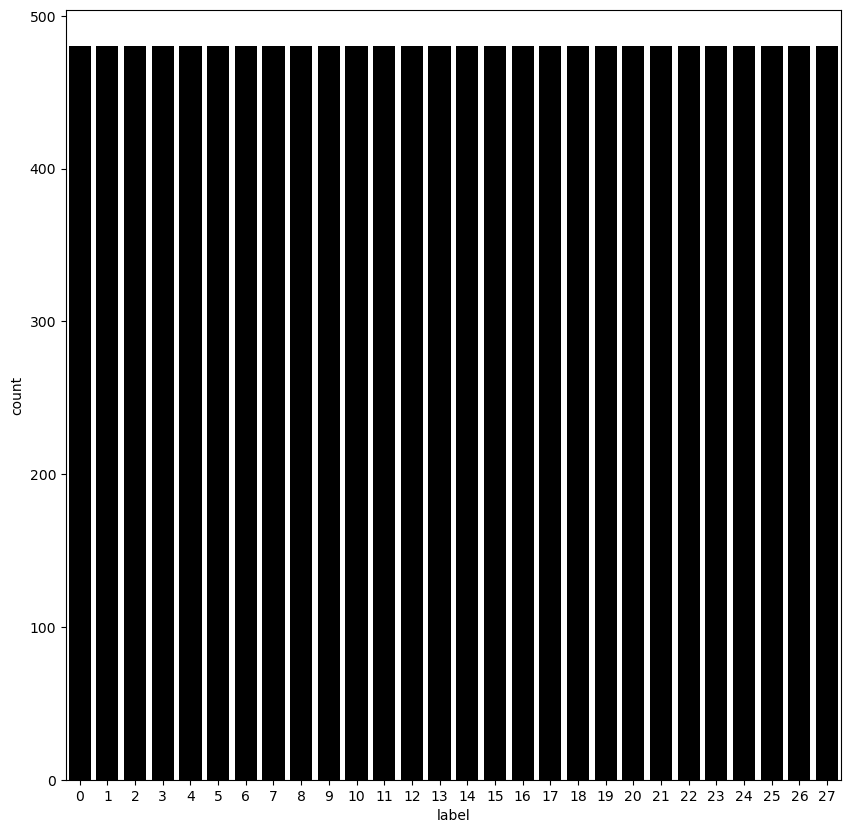

In [21]:
#train.groupby(by='label').count()
fig, ax = plt.subplots(figsize=(10, 10))
g = sns.countplot(data=train, x="label", color="black")
g.set_xticklabels(characters_dict);

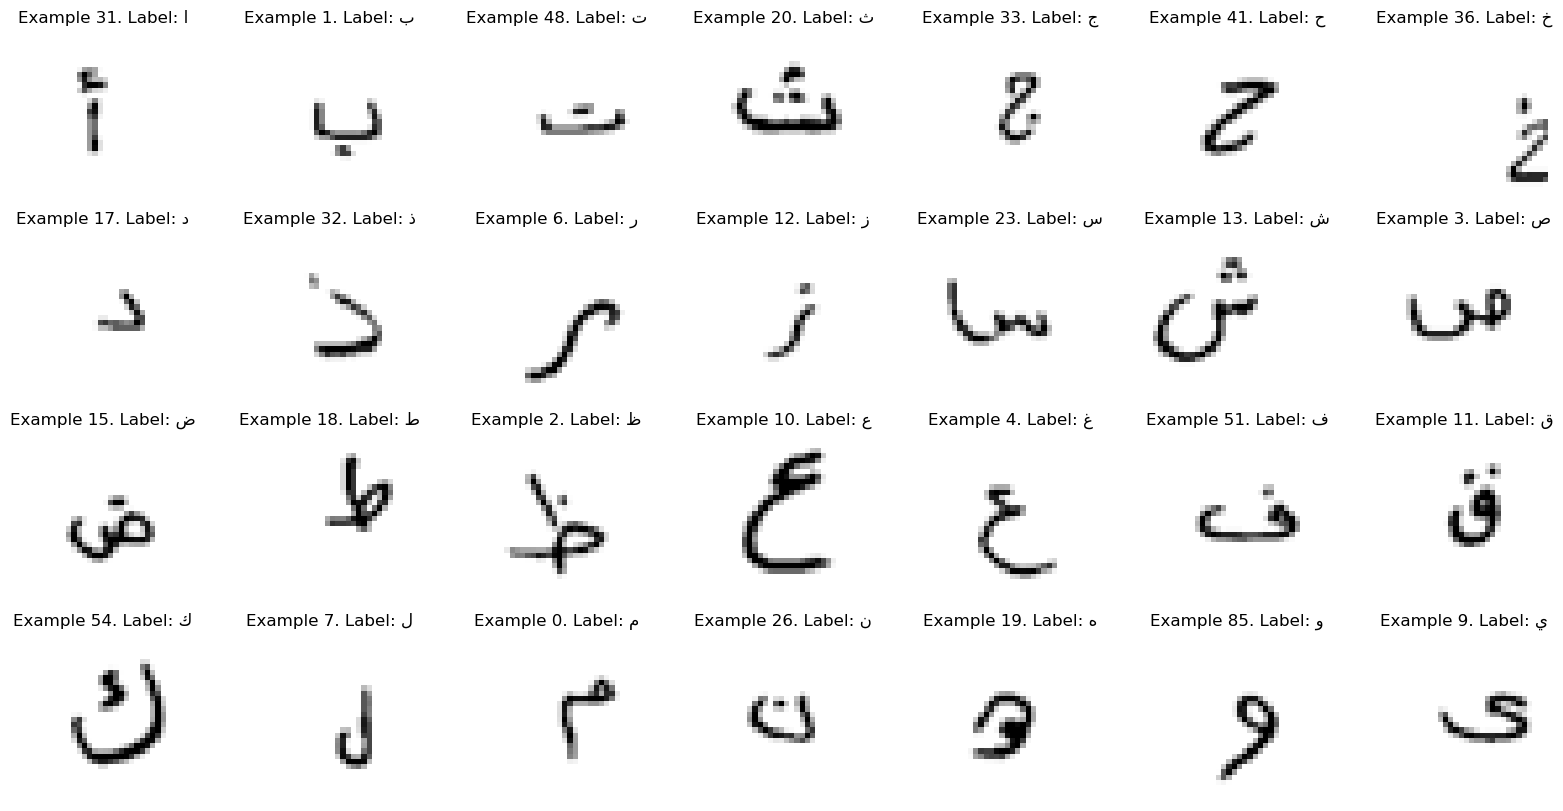

In [22]:
fig, ax = plt.subplots(4, 7, figsize=(20, 10))
index_list = train.groupby('label').first()['id'].tolist()
i = 0
for row in range(4):
    for col in range(7):
        plt.sca(ax[row, col])
        display_image(train_features, train['label'], index_list[i])
        plt.axis('off')
        i+=1

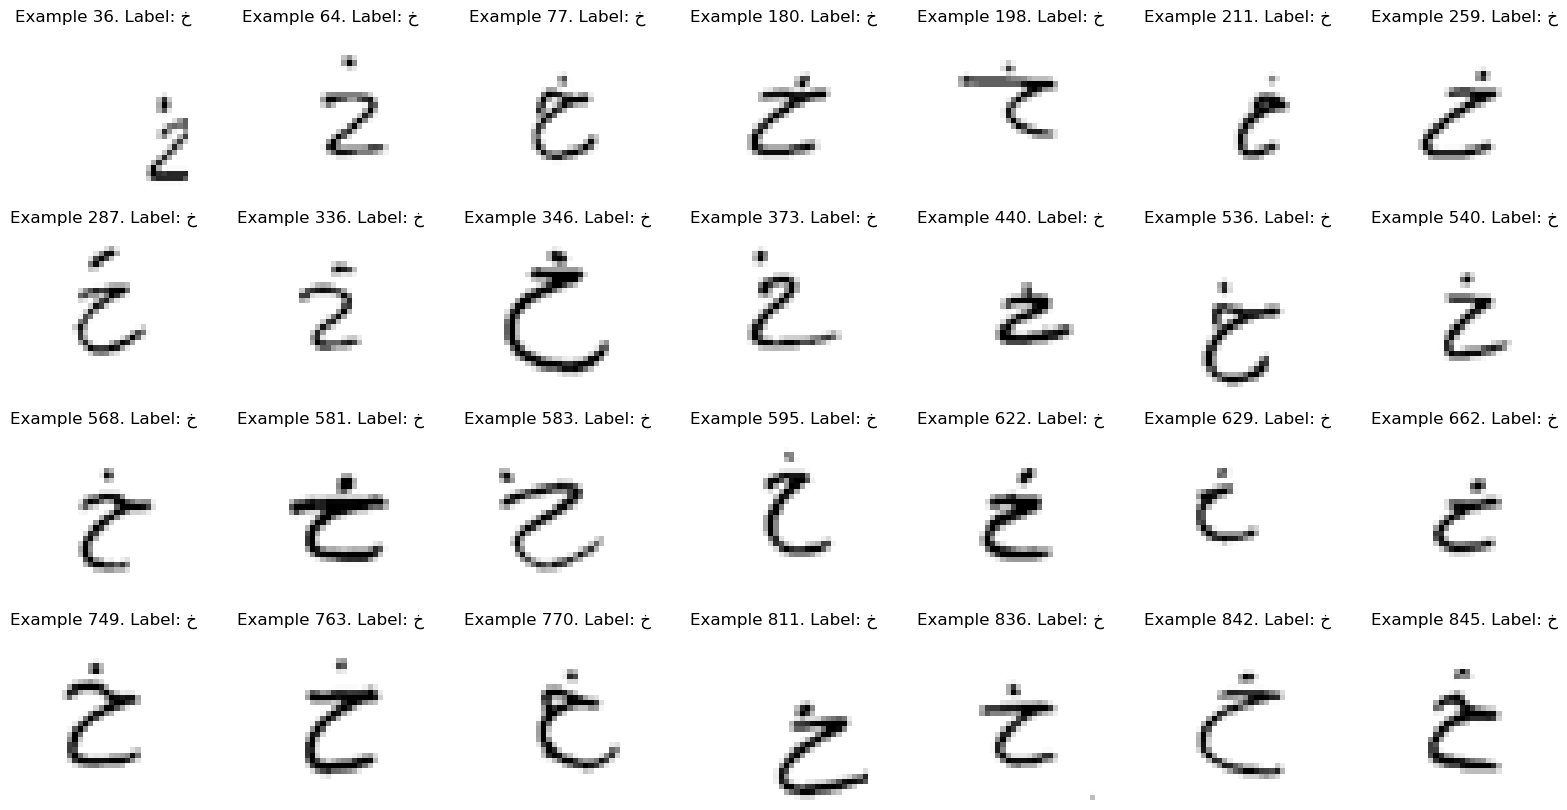

In [23]:
fig, ax = plt.subplots(4, 7, figsize=(20, 10))
index_list = train[train['label']==7].iloc[:28, :]['id'].tolist()
i = 0
for row in range(4):
    for col in range(7):
        plt.sca(ax[row, col])
        display_image(train_features, train['label'], index_list[i])
        plt.axis('off')
        i+=1

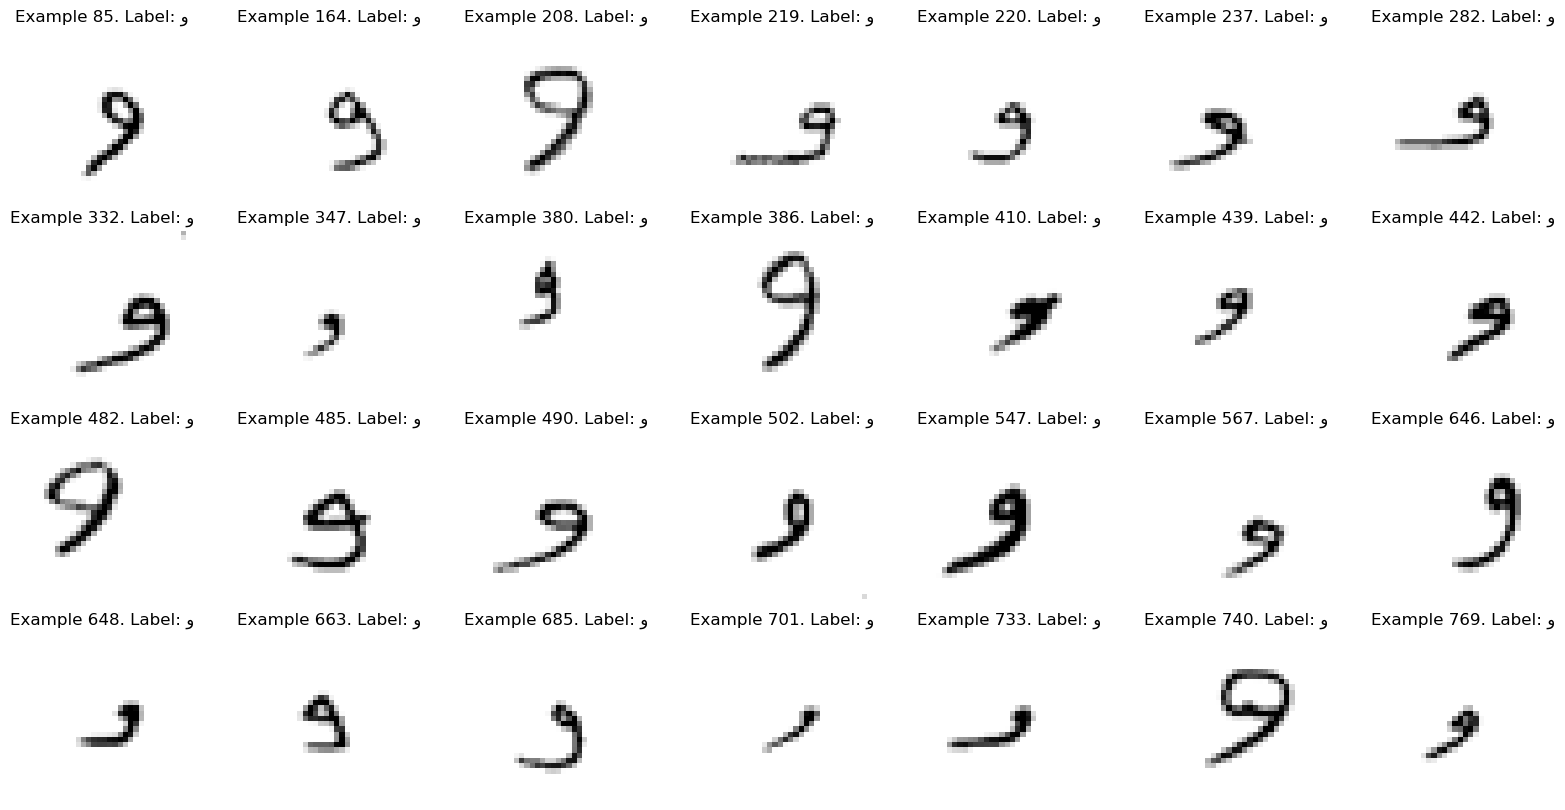

In [24]:
fig, ax = plt.subplots(4, 7, figsize=(20, 10))
index_list = train[train['label']==27].iloc[:28, :]['id'].tolist()
i = 0
for row in range(4):
    for col in range(7):
        plt.sca(ax[row, col])
        display_image(train_features, train['label'], index_list[i])
        plt.axis('off')
        i+=1

# Spliting_to _validation_for_testing

In [25]:
xtrain = {}
test = {}
validation = {}
xtrain['features'], validation['features'], xtrain['labels'], validation['labels'] = train_test_split(train_features, train['label'], test_size=0.1, stratify=train['label'],random_state=42)

In [26]:
print(' of training images:', xtrain['features'].shape)
print(' of validation images:', validation['features'].shape)
print(' of training labels:', xtrain['labels'].shape)
print('of validation labels:', validation['labels'].shape)

 of training images: (12096, 32, 32)
 of validation images: (1344, 32, 32)
 of training labels: (12096,)
of validation labels: (1344,)


# Normalize_and_reshaping

In [27]:
images_train = xtrain['features'].reshape([-1, 32, 32, 1])
print("images shape: {}".format(images_train.shape))
images_train = images_train/255

images shape: (12096, 32, 32, 1)


In [28]:
image_val=validation['features'].reshape((-1, 32, 32, 1))
print("images shape: {}".format(image_val.shape))
images_val = image_val/255

images shape: (1344, 32, 32, 1)


# Encoding_label

In [29]:
binencoder = LabelBinarizer()
y = binencoder.fit_transform(xtrain['labels'].to_numpy())
print("y shape: {}".format(y.shape))
print(y[0:5])

y shape: (12096, 28)
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]


In [30]:
binencoder = LabelBinarizer()
yv = binencoder.fit_transform(validation['labels'].to_numpy())
print("y shape: {}".format(yv.shape))
print(y[0:5])

y shape: (1344, 28)
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]


In [31]:
print(y.sum(axis=0))
print(yv.sum(axis=0))

[432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432
 432 432 432 432 432 432 432 432 432 432]
[48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48
 48 48 48 48]


In [86]:
baseline_model = Sequential()
baseline_model.add(Conv2D(filters=6, kernel_size=5, input_shape=(32, 32, 1), activation='tanh'))
baseline_model.add(MaxPooling2D(pool_size=2))

baseline_model.add(Conv2D(filters=16, kernel_size=5, activation='tanh'))
baseline_model.add(MaxPooling2D(pool_size=2))

baseline_model.add(GlobalAveragePooling2D())
baseline_model.add(Dense(28, activation = 'softmax')) 

baseline_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='Adam')

epochs = 10
batch_size = 2

baseline_model.fit(images_train, y, 
                  validation_data=(images_val,yv),
                  epochs=epochs, batch_size=batch_size, verbose=1)

# Test the baseline model
baseline_metrics = baseline_model.evaluate(images_train, y, verbose=5)
print("Baseline Model Test Accuracy: {}".format(baseline_metrics[1]))
print("Baseline Model Test Loss: {}".format(baseline_metrics[0]))

Epoch 1/10
6048/6048 [==============================] - 20s 3ms/step - loss: 2.9881 - accuracy: 0.1371 - val_loss: 2.7011 - val_accuracy: 0.2016
Epoch 2/10
6048/6048 [==============================] - 20s 3ms/step - loss: 2.4087 - accuracy: 0.2994 - val_loss: 2.2344 - val_accuracy: 0.3564
Epoch 3/10
6048/6048 [==============================] - 17s 3ms/step - loss: 2.0616 - accuracy: 0.4011 - val_loss: 1.9187 - val_accuracy: 0.4345
Epoch 4/10
6048/6048 [==============================] - 18s 3ms/step - loss: 1.8347 - accuracy: 0.4653 - val_loss: 1.7216 - val_accuracy: 0.5074
Epoch 5/10
6048/6048 [==============================] - 21s 3ms/step - loss: 1.6703 - accuracy: 0.5097 - val_loss: 1.5862 - val_accuracy: 0.5290
Epoch 6/10
6048/6048 [==============================] - 21s 3ms/step - loss: 1.5404 - accuracy: 0.5431 - val_loss: 1.5417 - val_accuracy: 0.5312
Epoch 7/10
6048/6048 [==============================] - 21s 3ms/step - loss: 1.4348 - accuracy: 0.5751 - val_loss: 1.3989 - val_ac

In [87]:
baseline_model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_15  (None, 16)               0         
  (GlobalAveragePooling2D)                                       
                                                     

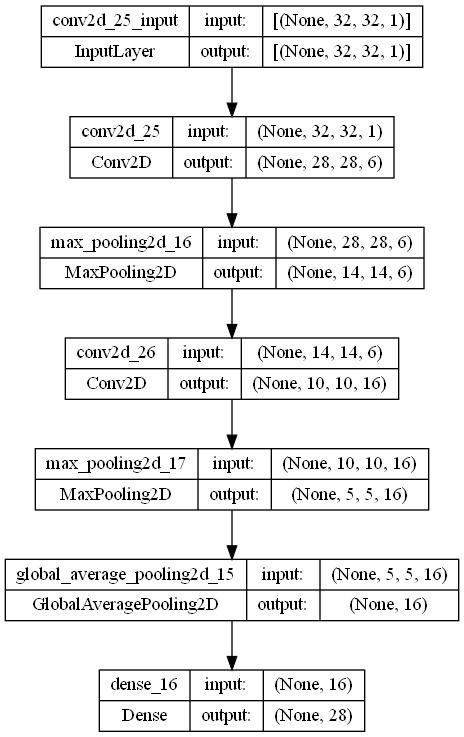

In [88]:

from keras.utils import plot_model

plot_model(baseline_model, to_file="model.png", show_shapes=True)
from IPython.display import Image as IPythonImage
display(IPythonImage('model.png'))

# Creating_Model

In [41]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense

def create_model(optimizer='adam', kernel_initializer='he_normal', activation='relu'):
  # create model
  model = Sequential()
  model.add(Conv2D(filters=32, kernel_size=5, padding='same', input_shape=(32, 32, 1), kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.1))

  model.add(Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.1))

 

  model.add(Conv2D(filters=256, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.1))
  model.add(GlobalAveragePooling2D())



  
  #Fully connected final layer
  model.add(Dense(28, activation='softmax'))

  # Compile model
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
  return model

# compiling_and_summary

In [487]:

model = create_model()
model.summary()
     

Model: "sequential_187"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_721 (Conv2D)         (None, 32, 32, 32)        832       
                                                                 
 batch_normalization_711 (Ba  (None, 32, 32, 32)       128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_667 (MaxPooli  (None, 16, 16, 32)       0         
 ng2D)                                                           
                                                                 
 dropout_668 (Dropout)       (None, 16, 16, 32)        0         
                                                                 
 conv2d_722 (Conv2D)         (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_712 (Ba  (None, 16, 16, 64)    

In [416]:
seed = 7
np.random.seed(seed)

# define the grid search parameters
optimizer = ['RMSprop', 'Adam', 'Adagrad', 'Nadam']
kernel_initializer = ['normal', 'uniform']
activation = ['relu', 'linear', 'tanh']

param_grid = dict(optimizer=optimizer, kernel_initializer=kernel_initializer, activation=activation)

# count number of different parameters values combinations
parameters_number = 1
for x in param_grid:
  parameters_number = parameters_number * len(param_grid[x]) 
print("Number of different parameter combinations = {}".format(parameters_number))

Number of different parameter combinations = 24


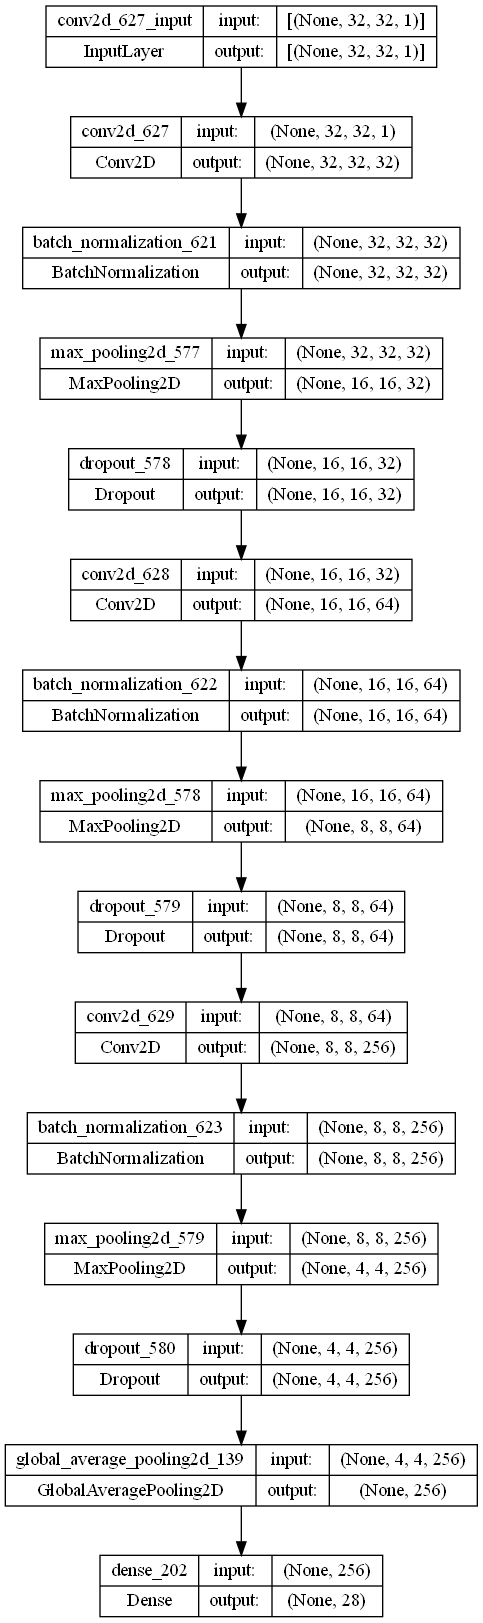

In [425]:

from keras.utils import plot_model

plot_model(model, to_file="model.png", show_shapes=True)
from IPython.display import Image as IPythonImage
display(IPythonImage('model.png'))

In [444]:

epochs = 5
batch_size = 20 
for a,b,c in [(x,y,z) for x in optimizer for z in activation for y in kernel_initializer]:
    params = {'optimizer' : a , 'kernel_initializer' : b , 'activation' : c}
    print(params)
    curr_model = create_model(a, b, c)
    curr_model.fit(images_train, y, 
                    validation_data=(images_val, yv),
                    epochs=epochs, batch_size=batch_size, verbose=1)
    print("=============================================================================")

{'optimizer': 'RMSprop', 'kernel_initializer': 'normal', 'activation': 'relu'}
Epoch 1/5
605/605 [==============================] - 14s 22ms/step - loss: 1.0745 - accuracy: 0.6905 - val_loss: 3.0755 - val_accuracy: 0.3817
Epoch 2/5
605/605 [==============================] - 13s 22ms/step - loss: 0.2999 - accuracy: 0.9110 - val_loss: 1.3495 - val_accuracy: 0.6280
Epoch 3/5
605/605 [==============================] - 13s 22ms/step - loss: 0.1951 - accuracy: 0.9391 - val_loss: 0.6479 - val_accuracy: 0.8051
Epoch 4/5
605/605 [==============================] - 13s 22ms/step - loss: 0.1471 - accuracy: 0.9540 - val_loss: 0.4729 - val_accuracy: 0.8616
Epoch 5/5
605/605 [==============================] - 14s 22ms/step - loss: 0.1234 - accuracy: 0.9611 - val_loss: 0.2464 - val_accuracy: 0.9219
{'optimizer': 'RMSprop', 'kernel_initializer': 'uniform', 'activation': 'relu'}
Epoch 1/5
605/605 [==============================] - 15s 23ms/step - loss: 0.8978 - accuracy: 0.7418 - val_loss: 7.1076 - val_

Epoch 3/5
605/605 [==============================] - 22s 36ms/step - loss: 0.5556 - accuracy: 0.8383 - val_loss: 1.3295 - val_accuracy: 0.6265
Epoch 4/5
605/605 [==============================] - 22s 37ms/step - loss: 0.4360 - accuracy: 0.8718 - val_loss: 1.4255 - val_accuracy: 0.5677
Epoch 5/5
605/605 [==============================] - 22s 36ms/step - loss: 0.3722 - accuracy: 0.8917 - val_loss: 2.1705 - val_accuracy: 0.4814
{'optimizer': 'Adam', 'kernel_initializer': 'normal', 'activation': 'tanh'}
Epoch 1/5
605/605 [==============================] - 23s 36ms/step - loss: 1.5769 - accuracy: 0.5745 - val_loss: 8.7950 - val_accuracy: 0.0499
Epoch 2/5
605/605 [==============================] - 22s 36ms/step - loss: 0.4949 - accuracy: 0.8692 - val_loss: 5.3532 - val_accuracy: 0.1012
Epoch 3/5
605/605 [==============================] - 22s 36ms/step - loss: 0.3063 - accuracy: 0.9156 - val_loss: 8.7253 - val_accuracy: 0.1339
Epoch 4/5
605/605 [==============================] - 22s 36ms/step

In [42]:

model = create_model(optimizer='RMSprop', kernel_initializer='normal', activation='relu')

# Check_Point_in every_epoch_to_comp_improve

In [44]:
checkpointer = ModelCheckpoint(filepath='weights2.hdf5', verbose=1, monitor='val_accuracy', save_best_only=True)
checkpointer2 = ModelCheckpoint(filepath='weights3.hdf5', verbose=1, monitor='val_accuracy', save_best_only=True)

earltstopping = EarlyStopping(monitor='val_accurracy',patience=7, min_delta=0.001)


# Fitting_Model

In [45]:
hist = model.fit(images_train, y, 
                    validation_data=(images_val,yv),
                    epochs=75, batch_size=20, verbose=1, callbacks=[checkpointer])

Epoch 1/75
603/605 [============================>.] - ETA: 0s - loss: 1.0910 - accuracy: 0.6896
Epoch 1: val_accuracy improved from -inf to 0.54018, saving model to weights2.hdf5
605/605 [==============================] - 12s 19ms/step - loss: 1.0893 - accuracy: 0.6903 - val_loss: 1.4951 - val_accuracy: 0.5402
Epoch 2/75
604/605 [============================>.] - ETA: 0s - loss: 0.3084 - accuracy: 0.9101
Epoch 2: val_accuracy improved from 0.54018 to 0.69643, saving model to weights2.hdf5
605/605 [==============================] - 12s 19ms/step - loss: 0.3081 - accuracy: 0.9102 - val_loss: 1.1403 - val_accuracy: 0.6964
Epoch 3/75
604/605 [============================>.] - ETA: 0s - loss: 0.1943 - accuracy: 0.9396
Epoch 3: val_accuracy did not improve from 0.69643
605/605 [==============================] - 12s 19ms/step - loss: 0.1946 - accuracy: 0.9396 - val_loss: 2.1778 - val_accuracy: 0.4397
Epoch 4/75
604/605 [============================>.] - ETA: 0s - loss: 0.1462 - accuracy: 0.95

604/605 [============================>.] - ETA: 0s - loss: 0.0223 - accuracy: 0.9925
Epoch 29: val_accuracy did not improve from 0.96577
605/605 [==============================] - 14s 23ms/step - loss: 0.0223 - accuracy: 0.9926 - val_loss: 0.1626 - val_accuracy: 0.9591
Epoch 30/75
605/605 [==============================] - ETA: 0s - loss: 0.0200 - accuracy: 0.9940
Epoch 30: val_accuracy did not improve from 0.96577
605/605 [==============================] - 13s 22ms/step - loss: 0.0200 - accuracy: 0.9940 - val_loss: 2.4165 - val_accuracy: 0.7143
Epoch 31/75
604/605 [============================>.] - ETA: 0s - loss: 0.0209 - accuracy: 0.9919
Epoch 31: val_accuracy did not improve from 0.96577
605/605 [==============================] - 13s 22ms/step - loss: 0.0209 - accuracy: 0.9919 - val_loss: 1.2204 - val_accuracy: 0.7924
Epoch 32/75
603/605 [============================>.] - ETA: 0s - loss: 0.0193 - accuracy: 0.9936
Epoch 32: val_accuracy did not improve from 0.96577
605/605 [========

Epoch 58/75
605/605 [==============================] - ETA: 0s - loss: 0.0112 - accuracy: 0.9959
Epoch 58: val_accuracy did not improve from 0.97545
605/605 [==============================] - 13s 21ms/step - loss: 0.0112 - accuracy: 0.9959 - val_loss: 0.1547 - val_accuracy: 0.9673
Epoch 59/75
604/605 [============================>.] - ETA: 0s - loss: 0.0104 - accuracy: 0.9967
Epoch 59: val_accuracy did not improve from 0.97545
605/605 [==============================] - 14s 23ms/step - loss: 0.0104 - accuracy: 0.9967 - val_loss: 0.1782 - val_accuracy: 0.9621
Epoch 60/75
603/605 [============================>.] - ETA: 0s - loss: 0.0116 - accuracy: 0.9964
Epoch 60: val_accuracy did not improve from 0.97545
605/605 [==============================] - 13s 21ms/step - loss: 0.0116 - accuracy: 0.9964 - val_loss: 0.2357 - val_accuracy: 0.9568
Epoch 61/75
604/605 [============================>.] - ETA: 0s - loss: 0.0104 - accuracy: 0.9960
Epoch 61: val_accuracy did not improve from 0.97545
605/6

In [58]:
model.save("mem_model.h5")

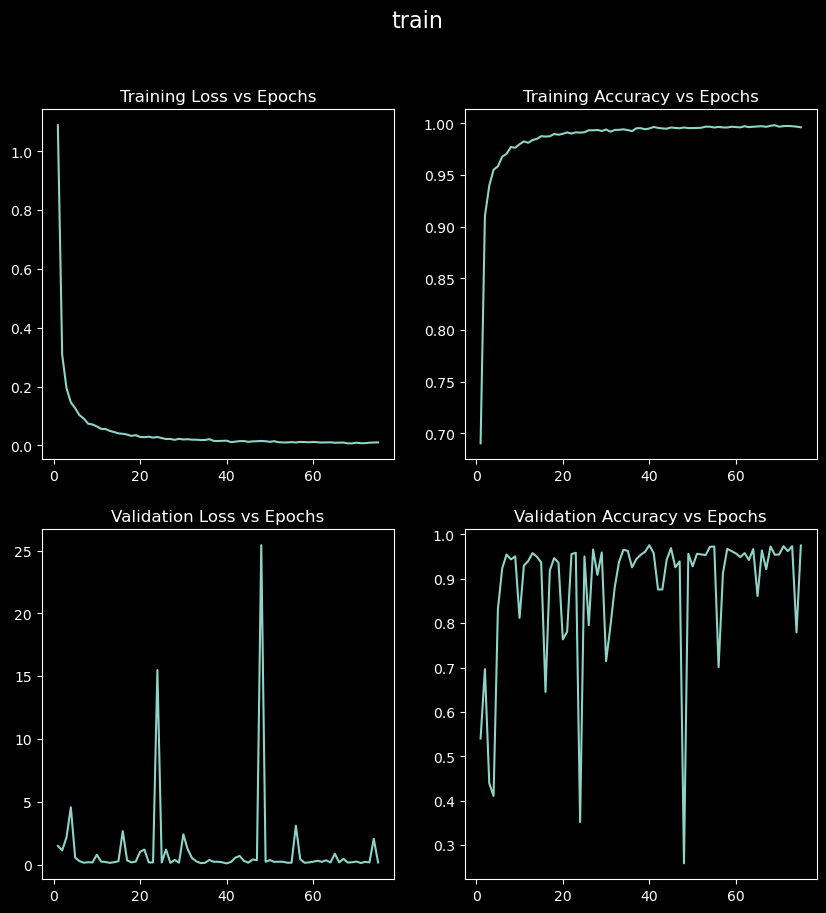

In [47]:
plt.style.use('dark_background')
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.lineplot(x=np.arange(1, 76), y=hist.history.get('loss'), ax=ax[0, 0])
sns.lineplot(x=np.arange(1, 76), y=hist.history.get('accuracy'), ax=ax[0, 1])
sns.lineplot(x=np.arange(1, 76), y=hist.history.get('val_loss'), ax=ax[1, 0])
sns.lineplot(x=np.arange(1, 76), y=hist.history.get('val_accuracy'), ax=ax[1, 1])
ax[0, 0].set_title('Training Loss vs Epochs')
ax[0, 1].set_title('Training Accuracy vs Epochs')
ax[1, 0].set_title('Validation Loss vs Epochs')
ax[1, 1].set_title('Validation Accuracy vs Epochs')
fig.suptitle('train', size=16)
plt.show()

In [50]:
test.head()

,id,label
0,0,26
1,1,10
2,2,1
3,3,10
4,4,15


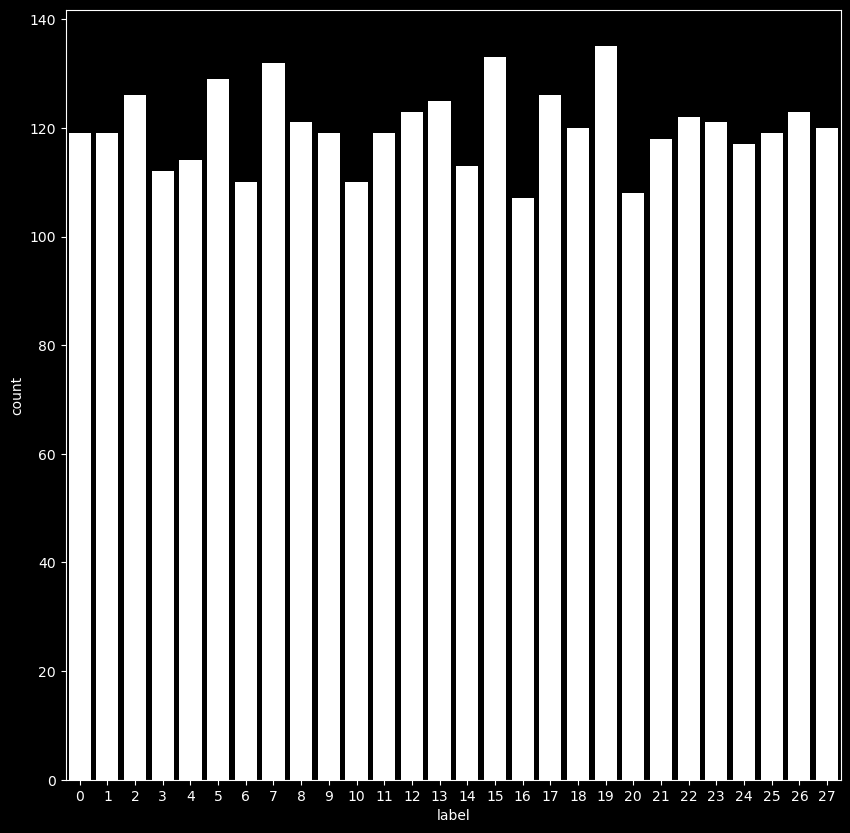

In [52]:
fig, ax = plt.subplots(figsize=(10, 10))
g = sns.countplot(data=test, x="label", color="white")
g.set_xticklabels(characters_dict);

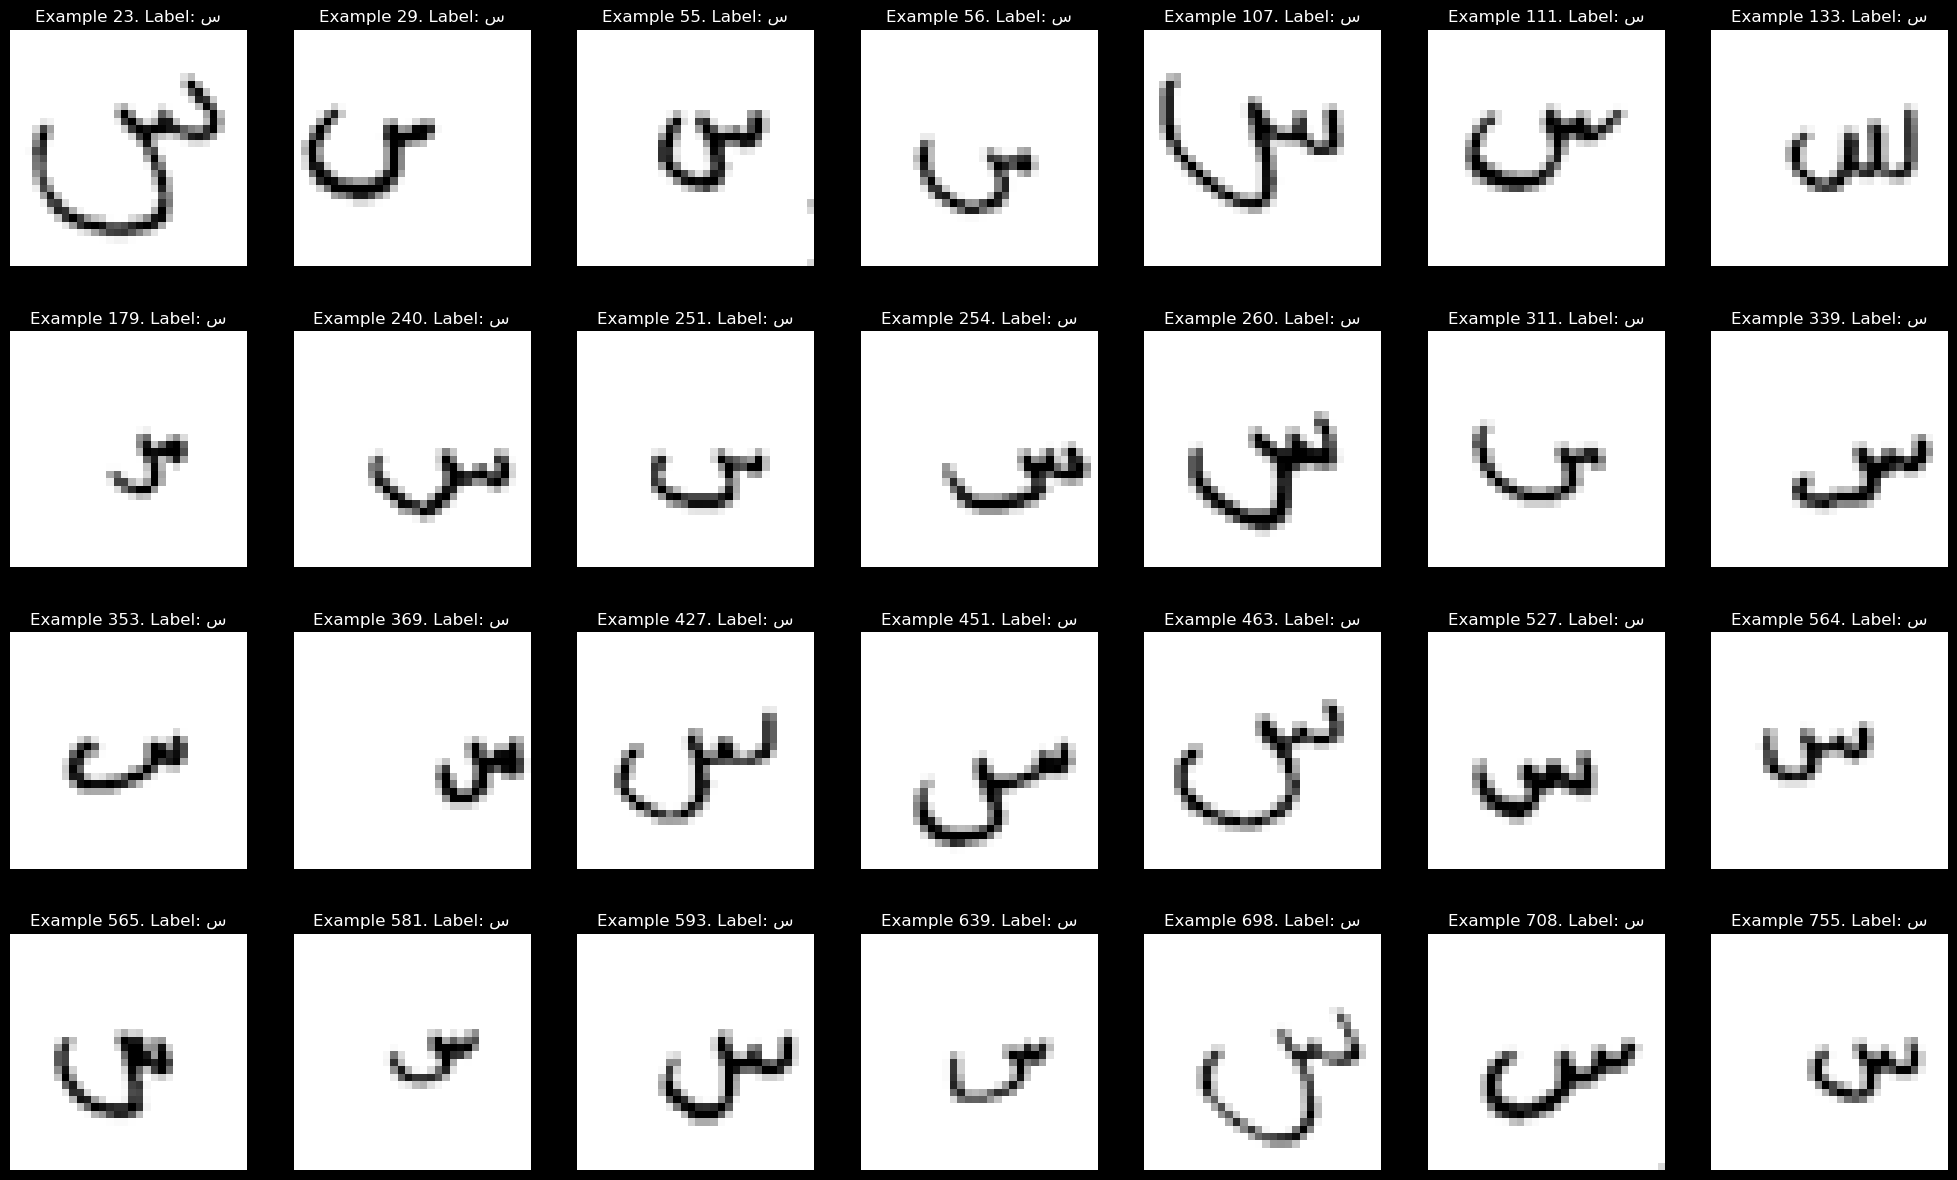

In [53]:
fig, ax = plt.subplots(4, 7, figsize=(25, 15))
index_list = test[test['label']==12].iloc[:28, :]['id'].tolist()
i = 0
for row in range(4):
    for col in range(7):
        plt.sca(ax[row, col])
        display_image(test_features, test['label'], index_list[i])
        plt.axis('off')
        i+=1

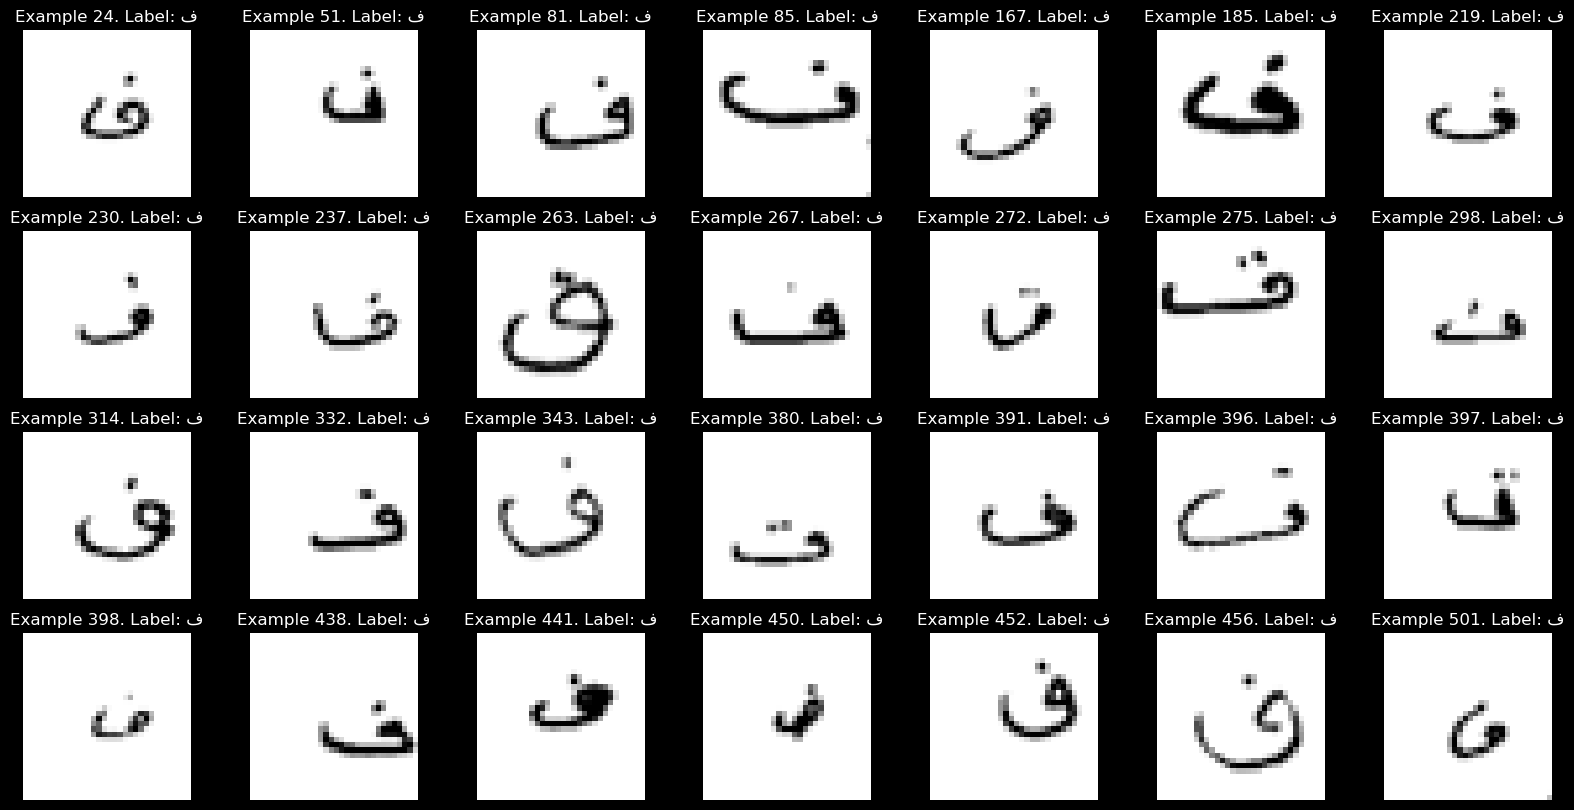

In [54]:
fig, ax = plt.subplots(4, 7, figsize=(20, 10))
index_list = test[test['label']==20].iloc[:28, :]['id'].tolist()
i = 0
for row in range(4):
    for col in range(7):
        plt.sca(ax[row, col])
        display_image(test_features, test['label'], index_list[i])
        plt.axis('off')
        i+=1

In [55]:
images_test = test_features.reshape((-1, 32, 32, 1))
print("images shape: {}".format(images_test.shape))
images_test = images_test/255

images shape: (3360, 32, 32, 1)


In [56]:
yt = binencoder.fit_transform(test['label'].to_numpy())
print("y shape: {}".format(yt.shape))
print(y[0:5])

y shape: (3360, 28)
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]


# Load_Moadel

In [60]:
from keras.models import load_model 
n_model=load_model('nem_model.h5')

# ACC_VALIDTION EVALUTE

In [65]:
n_model.evaluate(images_test, yt)

105/105 [==============================] - 1s 5ms/step - loss: 0.1120 - accuracy: 0.9771


[0.11196564137935638, 0.9770833253860474]

# Reporting_Accuracy

In [68]:
y_pred = n_model.predict(images_test)

pred = np.argmax(y_pred, axis=1) + 1
ground = np.argmax(yt, axis=1) + 1

print(classification_report(ground,pred))

105/105 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       119
           2       1.00      0.99      1.00       119
           3       0.92      0.98      0.95       126
           4       0.97      0.96      0.96       112
           5       0.97      1.00      0.99       114
           6       1.00      0.95      0.98       129
           7       0.92      1.00      0.96       110
           8       0.99      0.88      0.93       132
           9       0.99      0.96      0.97       121
          10       0.89      1.00      0.94       119
          11       0.96      0.98      0.97       110
          12       0.99      0.99      0.99       119
          13       1.00      0.98      0.99       123
          14       1.00      0.99      1.00       125
          15       0.98      1.00      0.99       113
          16       1.00      0.95      0.97       133
          17       0.94   

# Confusion_Matrix

<Axes: >

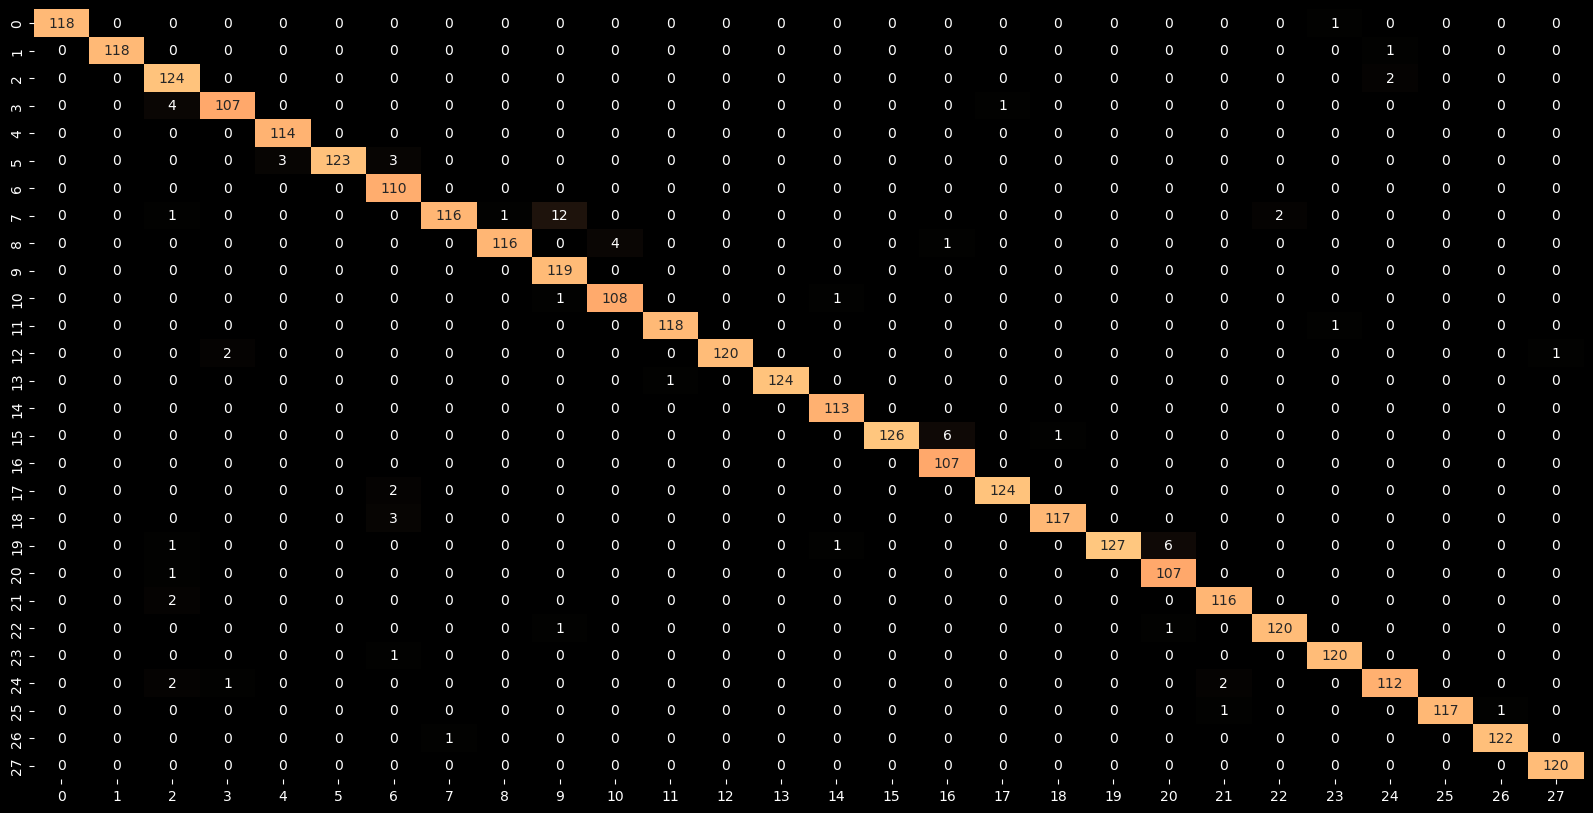

In [69]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
fig,ax=plt.subplots(figsize=(20,10))
cm = confusion_matrix(test['label'],pred)
sns.heatmap(cm,annot=True,cmap="copper",fmt="d",cbar=False,ax=ax)

# ACC

In [70]:
fpr_keras, tpr_keras, thresholds = roc_curve(ground.ravel(), pred.ravel(),pos_label=28)
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras

0.9998456790123457

# ROC_Curve

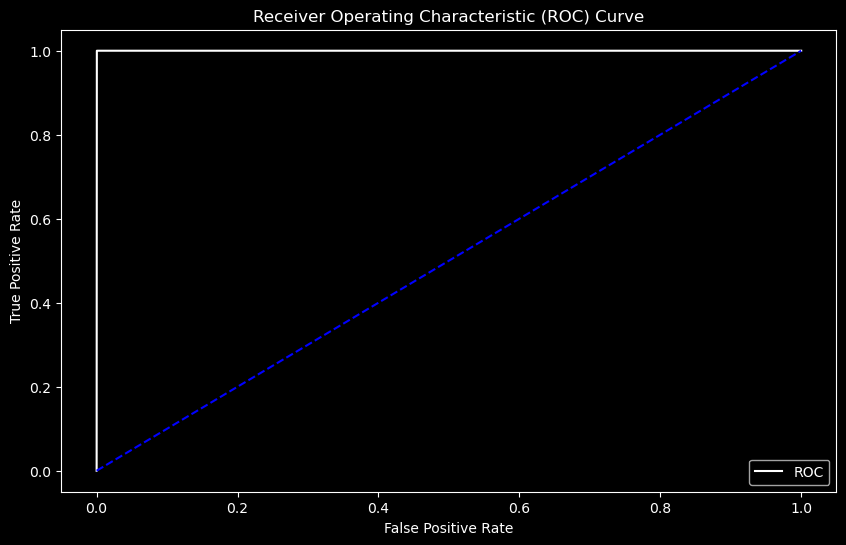

In [71]:
plot_roc_curve(fpr_keras, tpr_keras)

# Show_images

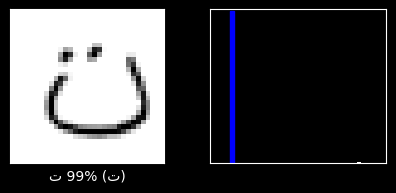

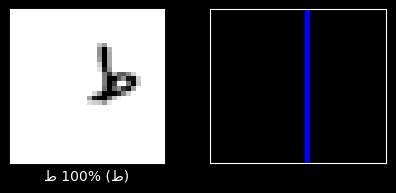

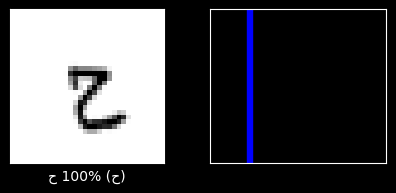

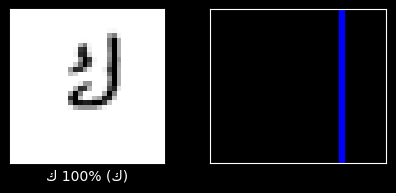

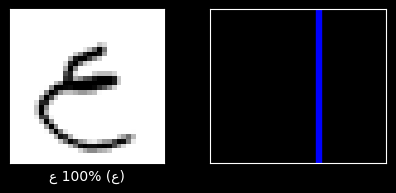

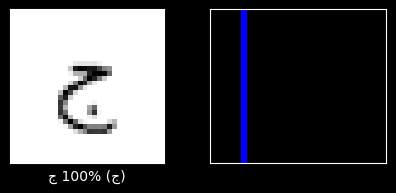

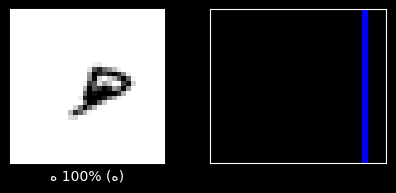

In [75]:
for i in range(7):
  i = np.random.randint(0,3000-1)
  plt.figure(figsize=(5,2))
  plt.subplot(1,2,1)
  plot_image(i, y_pred,ground-1 , images_test)
  plt.subplot(1,2,2)
  plot_value_array(i, y_pred,ground-1  )
  plt.show()